## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 05.02.2020

__Дедлайн:__ 15.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib, а в качестве бонусного задания сможете реализовать алгоритм KNN.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}})\right) \times 10 / 21,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. Все баллы сверх обязательных (9 в первой части и 12 во второй) идут в бонус. Таким образом, за это домашнее задание можно получить 4 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Для успешного выполнения этой части вам необходимо пройти все `assert`'ы.

In [0]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [0]:
def result_mark(weights: np.array, marks: np.array) -> int:
    weights.T
    return round(np.dot(weights, marks))

In [0]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])
assert result_mark(weights, marks) == 8

8.0


In [0]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [0]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
def change_array(array: np.array, number: int) -> np.array:
    a = np.arange(array.size)
    b = a[::3]
    array[b] = number
    return array

In [0]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [0]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [0]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
               dif = array1 - array2
               return np.argwhere(abs(dif) < precision).flatten()
                

In [0]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)
print(res)
assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

[0 1 3 6]


In [0]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)
assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [0]:
def block_matrix(block: np.array) -> np.array:
    a = np.vstack((block, block))
    return np.hstack((a, a))

In [0]:
block = np.array([[1, 3, 3], [7, 0, 0]])
assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [0]:
def diag_prod(matrix: np.array) -> int:
  a = np.diag(matrix)
  c = a[np.nonzero(a)]
  return c.prod()

In [0]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])
assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [3]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
A = matrix
B = A - np.mean(A, axis = 0)+0.00001
C = B[:][1]
print(C)
print(np.round((A - np.mean(A, axis=0)) / np.std(A, axis=0), 2))


[-6.66656667e-01  4.66667667e+00  1.60000001e+03]
[[ 0.71 -0.39  0.46]
 [-1.41  1.37  0.93]
 [ 0.71 -0.98 -1.39]]


In [0]:
def normalize(matrix: np.array) -> np.array:
  A = matrix
  B = A - np.mean(A, axis = 0)+0.00001
  #C = B[axis = 1]
  return (A - np.mean(A, axis=0)) / np.std(A, axis=0)
    # your code here

In [0]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [0]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [0]:
coefs = np.array([4, 6, 0, 1])
a = np.arange(coefs.size+1)
c = np.delete(a, 0)
print(c)
b = 1./c
b = np.flip(b)
print(b)
M = np.diag(b)
print(M)
d = (M.dot(coefs))
print(np.append(d, 0))

[1 2 3 4]
[0.25       0.33333333 0.5        1.        ]
[[0.25       0.         0.         0.        ]
 [0.         0.33333333 0.         0.        ]
 [0.         0.         0.5        0.        ]
 [0.         0.         0.         1.        ]]
[1. 2. 0. 1. 0.]


In [0]:
def antiderivative(coefs: np.array) -> np.array:
    a = np.arange(coefs.size+1)
    c = np.delete(a, 0)
    b = 1./c
    b = np.flip(b)
    M = np.diag(b)
    return np.append(M.dot(coefs), 0)

In [0]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [0]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [0]:
def make_symmetric(matrix: np.array) -> np.array:
    return matrix.T + matrix - np.diag(matrix.diagonal())

In [0]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [0]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [0]:
A = np.matrix('1 1').T
B = np.matrix('1; 2; 3').T
print(A)
print(B)
print(A.dot(B))

[[1]
 [1]]
[[1 2 3]]
[[1 2 3]
 [1 2 3]]


In [0]:
m = 5
a = 3
b = 10
print(np.asmatrix(np.ones(m)).T)
print(np.asmatrix(np.arange(a, b+1)))

def construct_matrix(m: int, a: int, b: int) -> np.array:
    A = np.asmatrix(np.ones(m)).T
    B = np.asmatrix(np.arange(a, b+1))    
    return A.dot(B)
print(construct_matrix(m, a, b))

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[ 3  4  5  6  7  8  9 10]]
[[ 3.  4.  5.  6.  7.  8.  9. 10.]
 [ 3.  4.  5.  6.  7.  8.  9. 10.]
 [ 3.  4.  5.  6.  7.  8.  9. 10.]
 [ 3.  4.  5.  6.  7.  8.  9. 10.]
 [ 3.  4.  5.  6.  7.  8.  9. 10.]]


In [0]:
m = 5
a = 3
b = 10
assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [0]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [0]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return (vec1.dot(vec2))/((vec1.dot(vec1))**0.5 * (vec2.dot(vec2))**0.5)

In [0]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [0]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [19]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [20]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
print(df[0:5])
print(df[-5:])
print(df.size)
print(df.shape[0], 'rows')
print(df.shape[1], 'columns')

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
     PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
886          887         0       2  ...  13.00   NaN         S
887          888         1       1  ...  30.00   B42         S
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[5 rows x 12 columns]
10692
891 rows
12 columns


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Вещественные признаки - это Age, SibSp, Parch, Fare.

Бинарные - это Survived, Sex.

Категориальные - это PassengerId, Pclass, Name, Ticket, Cabin, Embarcked.

Задача Регрессии: определить зависимость цены билета от класса

Задача Классификации: понять, выживет ли человек с заданными возрастомЮ классом и ценой билета.

Задача Кластеризации: попытаться дропнуть некоторые признаки, заменив их новым признаком принадлежности к классу, например, вместир SibSP и Parch использовать Relatives


### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [0]:
surv = df[df['Survived'] == 1].shape[0]
print(df.shape[0], surv)
#print(surv)
print((surv/(df.shape[0] - 1)), 'доля выживших')


891 342
0.3842696629213483 доля выживших


In [0]:
surv_m = df[(df['Survived'] == 1) & (df['Sex'] == 'male')].shape[0]
print(surv_m/surv, 'доля мужчин в выживших')
surv_f = df[(df['Survived'] == 1) & (df['Sex'] == 'female')].shape[0]
print(surv_f/surv, 'доля женщин в выживших')
#surv_ml = df[df[('Survived' == 1) & ('Sex' == 'male')]]
#print(surb_fml, 'доля женщин среди выживших')

0.31871345029239767 доля мужчин в выживших
0.6812865497076024 доля женщин в выживших


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [0]:
print(df['Pclass'].value_counts())
a = df['Pclass'].value_counts().idxmax()
oleg = df[df['Pclass'] == a]
print(oleg['Sex'].value_counts().idxmax())


3    491
1    216
2    184
Name: Pclass, dtype: int64
male


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [22]:
fare = df['Fare']
#print(fare)
print(min(fare), 'minimal')
print(fare.mean(), 'mean')
print(max(fare), 'maximal')
fare_s = df[df['Embarked'] == 'S']['Fare']
#print(fare_s)
print(min(fare_s), 'minimal S')
print(fare_s.mean(), 'mean S')
print(max(fare_s), 'maximal S')

0.0 minimal
32.2042079685746 mean
512.3292 maximal
0.0 minimal S
27.07981180124218 mean S
263.0 maximal S


S


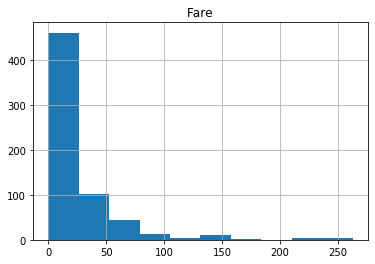

In [33]:
df[df['Embarked'] == 'S'].hist(column = 'Fare')
print('S')

C


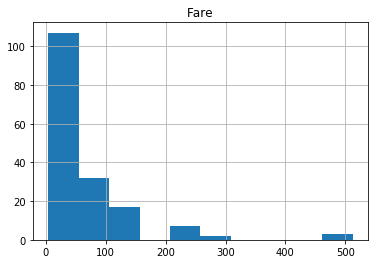

In [31]:
df[df['Embarked'] == 'C'].hist(column = 'Fare')
print('C')

Q


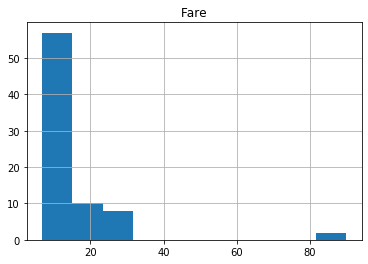

In [32]:


df[df['Embarked'] == 'Q'].hist(column = 'Fare')
print('Q')

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

Считаю ненужными столбцы PassengerId, Name, Cabin
ID и Имя очевидно бесполезны для статистического анализа. Кабина была бы итересна, не будь у нас Класса, + В кэбин половина значений не заполнены, столбец практически пустой. 

In [0]:
df.drop(['PassengerId', 'Name', 'Cabin'], axis = 1)


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [72]:
df.isnull().any()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 18

*Подумайте*, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

В возрасте нужно писать средний возраст.
Кабину дропнем. В Эмбаркд запишем самый часто втречающийся, потому что там всего 2 пропуска, и это не сильно сдвинет среднее.

In [73]:
data = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
mean_age = data['Age'].mean(skipna = True)
data['Age'] = data['Age'].fillna(mean_age)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].value_counts().idxmax())
data.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

0.09606669176903888


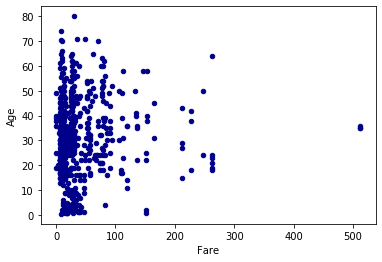

In [74]:
print(df['Fare'].corr(df['Age']))
ax1 = df.plot.scatter(x='Fare',
                      y='Age',
                      c='DarkBlue')

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

0.2573065223849625


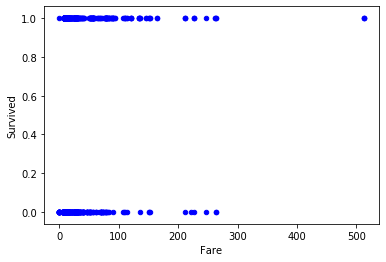

In [0]:
print(df['Fare'].corr(df['Survived']))
ax1 = df.plot.scatter(x='Fare',
                      y='Survived',
                      c='Blue')

Да, правда, вероятность выжить больше у пассажиров с более дорогой ценой билета. Корреляция между этими двумя величинами составляет 0.2573065223849625

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

Мой признак - это молился ли человек перед посадкой на Титаник. Этот признак покажет, помогает ли молитва или какие-либо действия перел посадкой вообще.

In [0]:
data['Relatives'] = data['SibSp'] + data['Parch'] + 1
data['Prayed'] = round(data['Fare'] /(2 * data['Fare'].mean()))
data['Prayed'] = data['Prayed'].astype(int)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Prayed
0,0,3,male,22.000000,1,0,7.2500,S,2,0
1,1,1,female,38.000000,1,0,71.2833,C,2,1
2,1,3,female,26.000000,0,0,7.9250,S,1,0
3,1,1,female,35.000000,1,0,53.1000,S,2,1
4,0,3,male,35.000000,0,0,8.0500,S,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,0
887,1,1,female,19.000000,0,0,30.0000,S,1,0
888,0,3,female,29.699118,1,2,23.4500,S,4,0
889,1,1,male,26.000000,0,0,30.0000,C,1,0


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

Как звали пассажира, заплатившего за самый дорогой билет?

In [35]:
#print(df['Fare'].value_counts())
a = df['Fare'].value_counts().idxmax()
kek = df[df['Fare'] == a]
print(kek['Name'].value_counts().idxmax())

Rush, Mr. Alfred George John


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff9a5a9d68>,
      dtype=object)

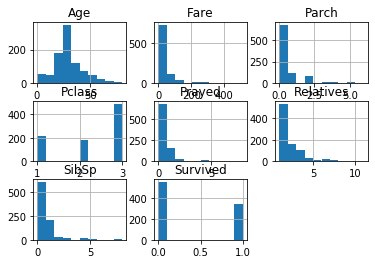

In [0]:
data.hist(normed = 0)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff99be0da0>,
      dtype=object)

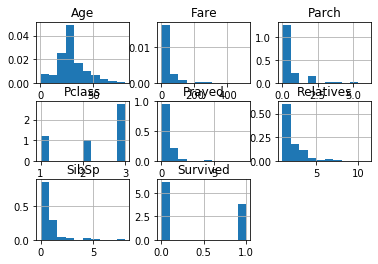

In [0]:
data.hist(normed = 1)

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [0]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 2, 'Q': 3})
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Prayed
0,0,3,1,22.000000,1,0,7.2500,0,2,0
1,1,1,0,38.000000,1,0,71.2833,2,2,1
2,1,3,0,26.000000,0,0,7.9250,0,1,0
3,1,1,0,35.000000,1,0,53.1000,0,2,1
4,0,3,1,35.000000,0,0,8.0500,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,1,0
887,1,1,0,19.000000,0,0,30.0000,0,1,0
888,0,3,0,29.699118,1,2,23.4500,0,4,0
889,1,1,1,26.000000,0,0,30.0000,2,1,0


# 3 KNN своими руками (Бонусное задание: 4 балла)

### 25
В этом задании вам предстоить реализовать метод KNN для задачи классификации. Перед вами интерфейс класса, который вам предстоить реализовать. От вас требуется реализовать методы:
* `__init__(self, n_neighbors)`
* `fit(self, X, y)`
* `predict(self, X)`
* `predict_proba(self, X)`

Все ближайшие соседи должны иметь одинаковые веса при построении предсказания. В качестве метрики используйте евклидово расстояние.

Для поиска ближайших соседей можно воспользоваться готовыми структурами данных из подмодуля `sklearn.neighors`, например `KDTree`. Структуры данных из этого подмодуля принимают на вход массив точек, а потом позволяют делать запросы и быстро находить ближайших соседей.

Для проверки работы вашей реализации примените алгоритм ближайших соседей на датасете из пункта 24.
Какие метрики качества у вас получаются? Сравните свои результаты с результатами KNN из библиотеки sklearn.

In [0]:
from sklearn.base import BaseEstimator

class MyNeighborsClassifier(BaseEstimator):
    def __init__(self, n_neighbors):
        super().__init__()
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
    
    def predict_proba(self, X):
        pass